 # <center> Lista 03 - Aprendizado de Máquina </center>

**Aluno(a):** Marianna de Pinho Severo <br>
**Matrícula:** 374856 <br>
**Professor(a):** Regis Pires

## 1) Crie um documento do Jupyter Notebook para criar um modelo preciso de classificação para o Iris Dataset.
O dataset foi baixado de [Iris dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data) e foi salvo em no arquivo *iris.csv*, em que a primeira linha indica os nomes das colunas.


## 2) Baixe e carregue os dados.
Uma vez que os dados já foram baixados, agora iremos carregá-los. Para isso, primeiramente importaremos todas as bibliotecas que serão utilizadas para essa e as outras atividades da lista.

### Passo 01: Importar bibliotecas

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics #biblioteca utilizada para extrair as métricas de desempenho do algoritmo de aprendizagem.

### Passo 02: Criar função para carregamento dos dados
DATASET_PATH é um define que indica onde o conjunto de dados está armazenado no computador. Nesse caso, está em uma pasta, chamada *dataset*, localizada dentro da pasta em que este notebook se encontra.

In [2]:
DATASET_PATH = "dataset/"

A função *load_flowers_data* é responsável por abrir o arquivo que contém o conjunto de dados, chamado *iris.csv*, e retornar seus valores no formato DataFrame, que é uma estrutura de dados de duas dimensões, cujos eixos são rotulados.

In [3]:
def load_flowers_data(dataset_path = DATASET_PATH):
    cols = ['sepal_length','sepal_width','petal_length','petal_width','label']
    csv_path = os.path.join(dataset_path, "iris.csv")
    return pd.read_csv(csv_path, names=cols)

### Passo 03: Carregar os dados
Por fim, carregaremos o conjunto de dados dentro da variável *flowers*, que será utilizada para a realização das próximas operações.

In [4]:
flowers = load_flowers_data()

## 3) Faça uma breve análise dos dados.
Nessa etapa, utilizaremos algumas das funções apresentadas no Capítulo 02 do livro **Hands-On Machine Learning with Scikit-Learn and TensorFlow** para uma breve visualização e análise do conjunto de dados.

### Passo 01: Método head()
O conjunto de dados (*dataset*) está armazenado na variável *flowers*. Com o método *head()*, apresentamos as cinco primeiras linhas desse conjunto, em formato de tabela. Nela, é possível ver que o conjunto de dados possui quatro atributos, que são o **comprimento da sépala**, a **largura da sépala**, o **comprimento da pétala** e a **largura da pétala**, todos expressos em centímetros. Além disso, a partir desses atributos, os dados podem ser classificados em três classes: **Iris-setosa**, **Iris-versicolor** e **Iris-virginica**, apresentadas na última coluna (label).

In [5]:
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Passo 02: Método info()
Utilizando o método *info()*, obtemos uma descrição rápida dos dados. É possível observar que o *dataset* possui 150 linhas, sendo elas numeradas de 0 a 149; que ele possui cinco colunas, em que as quatro primeiras são para os atributos e a última é para o *label*, ou classe, dos dados; que os atributos são do tipo *float* e a classe é do tipo objeto; também é possível observar que todas as linhas estão preenchidas, o que significa que não há linhas nem colunas sem valores.

In [6]:
flowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
label           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Passo 03: Método value_counts()
Utilizando o método *value_counts()*, é possível observarmos quais classes existem no conjunto de dados e quantas linhas correspondem a cada uma delas.

In [7]:
flowers["label"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: label, dtype: int64

Utilizando o método *plot()*, com a configuração **kind='bar'**, podemos visualizar as informações apresentadas pelo método *value_counts()* em um gráfico de barras, conforme pode ser observado abaixo.

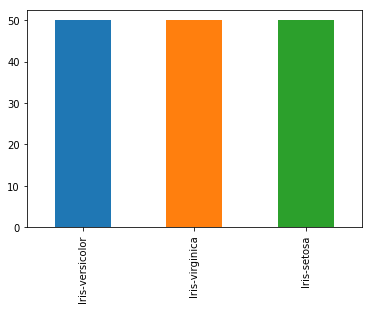

In [8]:
flowers['label'].value_counts().plot(kind='bar');

### Passo 04: Método describe()
Com o método *describe()*, uma tabela com um resumo de todos os dados do *dataset* é mostrada. A linha **std** indica o *desvio padrão* dos dados. Já, as linhas **25%**, **50%** e **75%** indicam os percentis, que são valores abaixo dos quais uma determinada porcentagem de observações em um grupo recai.

In [9]:
flowers.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


De acordo com a tabela, é possível observar que: as flores possuem um comprimento médio de sépala e de pétala de, aproximadamente, 5.84 cm e 3.758 cm, respectivamente; que elas possuem uma largura média de sépala e de pétala de, aproximadamente 3.054 cm e 1.198 cm, respectivamente; que 25% das flores possuem comprimento de sépala menor do que 5.1 cm; que 50% das flores possuem comprimento de pétala menor do que 4.35 cm; que 75% das flores possuem largura de sépala menor do que 3.3 cm; que a largura máxima de pétala é de 2.5 cm; entre outras características.

### Passo 05: Método hist()
Utilizando o método *hist()*, podemos observar os histogramas do conjunto de dados, em que cada gráfico representa um atributo, o eixo horizontal de cada gráfico representa o valor que aquele atributo possui e o eixo vertical representa quantas instâncias dos dados possuem aquele valor.

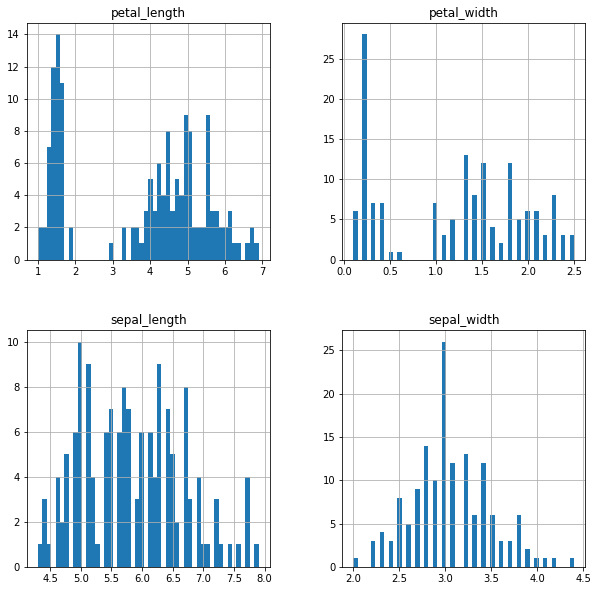

In [10]:
flowers.hist(bins=50, figsize=(10,10))
plt.show()

É possível observar, de acordo com a distribuição dos dados, que a maior variedade de comprimentos e larguras ocorre para valores acima da média.

### Passo 06: Método tail() 
Esse método mostra as últimas cinco linhas do conjunto de dados.

In [11]:
flowers.tail()

,sepal_length,sepal_width,petal_length,petal_width,label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Passo 07: Método corr()

Esse método calcula a correlação entre os atributos do conjunto de dados. Por padrão, o método de correlação empregado é o *Pearson correlation coefficient*, que é uma medida linear de correlação entre duas variáveis. Quanto mais próxima de 1, mais forte é a correlação em um sentido positivo; quanto mais próxima de -1, mais forte ela é em um sentido negativo; e, por último, quanto mais próxima de 0, menor é a correlação entre as duas variáveis consideradas.

O método *set_precision(n)* formata os valores da tabela, fazendo com que eles possuam, no máximo, **n** casas decimais. Para isso, ele arredonda os dígitos até que se chegue às n casas.

O método *background_gradient()* cria um mapa de calor (*heat map*). Para essa análise, utilizamos o padrão de cores **RdYlGn**, fazendo com que os valores mais negativos ganhem tons cada vez mais vermelhos, os valores intermediários sejam pintados com tons amarelados e os valores mais positivos ganhem tons cada vez mais verdes.

In [12]:
flowers.corr().style.set_precision(4)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1,-0.1094,0.8718,0.818
sepal_width,-0.1094,1,-0.4205,-0.3565
petal_length,0.8718,-0.4205,1,0.9628
petal_width,0.818,-0.3565,0.9628,1


In [13]:
flowers.corr().style.background_gradient(cmap='RdYlGn').set_precision(2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1,-0.11,0.87,0.82
sepal_width,-0.11,1,-0.42,-0.36
petal_length,0.87,-0.42,1,0.96
petal_width,0.82,-0.36,0.96,1


Podemos observar que os atributos possuem correlação máxima e positiva com eles mesmos. O comprimento da sépala possui uma elevada correlação positiva com o comprimento e largura da pétala, ou seja, quanto maior forem esses valores, maior será o comprimento da sépala e vice-versa. Por outro lado, ele possui uma pequena correlação negativa com a largura da sépala, ou seja, quanto maior for esse valor, menor será o comprimento da sépala, mas essa variação ocorrerá mais lentamente. Também é possível observar que o comprimento da pétala tem uma elevada correlação positiva com sua largura.

## 4) Separe parte dos dados para treino (5%) e parte para teste (95%). Esta divisão não  é   usual, mas vai nos permitir algumas análises. Considere somente as classes Setosa e Virgínica.

### Passo 01: Extrair conjunto de dados de interesse

Como queremos apenas as classes Iris-setora e Iris-virginica, primeiramente vamos capturar apenas essa parte do conjunto de dados.

In [14]:
# O que o operador | está fazendo exatamente?
flowers = flowers[ (flowers['label'] == 'Iris-setosa') | (flowers['label'] == 'Iris-virginica') ]

Utilizando o método *value_counts()*, podemos observar que apenas os dados referentes às classes Iris-setora e Iris-virginica estão presentes no conjunto de dados, conforme desejado.

In [15]:
flowers['label'].value_counts()

Iris-virginica    50
Iris-setosa       50
Name: label, dtype: int64

### Passo 02: Mapear labels para números

Os *labels* do nosso conjunto de dados estão no formato texto, que é humanamente legível. Entretanto, para que possamos utilizar os algoritmos de aprendizado requisitados, precisamos transformar esses textos para um formato de representação que os algoritmos entendam. Nesse caso, esse formato são números. Como os algoritmos empregados são binários (sua saída só possui dois valores possíveis), mapearemos as duas classes para 1 (Iris-setosa) e -1 (Iris-virginica).

In [16]:
flowers['label'] = np.where(flowers['label'] == 'Iris-setosa', 1, -1)

### Passo 03: Extrair os valores
Agora, extrairemos os valores contidos na estrutura *flowers*, que é do tipo *DataFrame*. Para isso, utilizaremos o atributo *values*, que retorna uma estrutura NumPy que contém os dados existentes na estrutura *flowers*,  retirando-se os nomes dos eixos, e a salvaremos na estrutura  **dataset**.

In [17]:
dataset = flowers.values

### Passo 04: Separar *features* e *lables*
Agora, salvaremos na estrutura X todas as características que serão utilizadas pelo algoritmo de aprendizado para realizar classificação. Elas podem ser entendidas como a entrada do sistema. Então, salvaremos na estrutura Y todos os lables, que, neste caso, são classes, do conjunto de dados. Eles podem ser entendidos como a saída do sistema e correspondem aos valores que o algoritmo dever prever, ou classificar, de acordo com a entrada recebida.

In [18]:
X = dataset[:,:-1]
y = dataset[:,-1]

### Passo 05: Tornar os dados aleatórios
Os dados do conjunto de dados estão ordenados de acordo com suas classes, ou seja, as primeiras cinquenta linhas referem-se a uma classe e as outras cinquenta linhas, à classe restante. Dessa forma, como separaremos esses dados em um conjunto de treino e um de teste, é importante que o conjunto de treino tenha dados de todas as classes. Portanto, reorganizando as linhas de forma aleatória, garantiremos que esse conjunto tenha acesso aos dados desejados. Para isso, utilizaremos os métodos **random.RandomState()** e **permutation()**.

In [19]:
rs = np.random.RandomState(1)
shuffled_indices = rs.permutation(X.shape[0])

X = X[shuffled_indices]
y = y[shuffled_indices]
shuffled_indices

array([80, 84, 33, 81, 93, 17, 36, 82, 69, 65, 92, 39, 56, 52, 51, 32, 31,
       44, 78, 10,  2, 73, 97, 62, 19, 35, 94, 27, 46, 38, 67, 99, 54, 95,
       88, 40, 48, 59, 23, 34, 86, 53, 77, 15, 83, 41, 45, 91, 26, 98, 43,
       55, 24,  4, 58, 49, 21, 87,  3, 74, 30, 66, 70, 42, 47, 89,  8, 60,
        0, 90, 57, 22, 61, 63,  7, 96, 13, 68, 85, 14, 29, 28, 11, 18, 20,
       50, 25,  6, 71, 76,  1, 16, 64, 79,  5, 75,  9, 72, 12, 37])

In [20]:
X[:5]

array([[7.4, 2.8, 6.1, 1.9],
       [6.1, 2.6, 5.6, 1.4],
       [5.5, 4.2, 1.4, 0.2],
       [7.9, 3.8, 6.4, 2. ],
       [6.8, 3.2, 5.9, 2.3]])

### Passo 06: Criação dos conjuntos de treino e de teste
Por fim, criaremos os conjuntos de treino e teste, salvando, nas estruturas **X_train** e **y_train**, 5% dos dados e, nas estruturas **X_test** e **y_test**, os 95% restantes. Nas estruturas que começam com *X_* estão os dados de entrada e nas que começam com *y_*, os de saída.

In [21]:
n_train = int(round(len(y) * 0.05))
X_train = X[:n_train,:]
y_train = y[:n_train]
X_test = X[n_train:,:]
y_test = y[n_train:]

## 5) Crie modelos de aprendizado de máquina com diferentes hiper-parâmetros usando Perceptron e Adaline-GD (Adaline com Gradiente Descendente).

### Passo 01: Criar Perceptron
O Perceptron é um modelo de aprendizado binário, ou seja, sua saída só possui dois valores possíveis. Entretanto, com algumas adaptações, ele pode ser empregado para modelos de aprendizado em que se deseja mais de dois valores de saída. Seus hiperparâmetros são a **taxa de aprendizado**(*eta*) e o **número de epochs**(*n_iter*).

In [22]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Passo 02: Criar Adaline
O Adaline é um modelo de aprendizado baseado no Perceptron. Suas principais diferenças são o fato de a função de ativação do Adaline ser uma função linear (nesse caso, identidade), ao invés de uma função de passo unitário; o Adaline também possui uma função de limite, a qual funciona como um passo unitário, que recebe a saída da função de ativação e apresenta o valor final do algoritmo como um de dois valores; além disso, ao contrário do que acontece no Perceptron, todo o conjunto de treino é utilizado, de uma vez, antes de os pesos serem atualizados; para que os pesos sejam atualizados, a saída da função de ativação, e não da saída final do algoritmo, é utilizada para o cálculo do erro; por fim, a atualização dos pesos depende de um algoritmo chamado de *Gradient Descent*, que é dado pela derivada parcial da função de custo, para cada peso do modelo. O *Gradient Descent* é empregado para minimizar a **Função de Custo**, que é empregada para o ajuste dos pesos. A mudança final a ser realizada em um determinado peso é dada pela taxa de aprendizado do algoritmo multiplicada pelo negativo do gradient descent. 

Seus hiperparâmetros são a **taxa de aprendizado** (*eta*) e o **número de epochs** (*n_iter*).

In [23]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

## 6) Calcule a acurácia dos modelos gerados e mostre qual o melhor deles, considerando esssa métrica.
Nessa etapa, vamos treinar os modelos utilizando diferentes valores para *eta* e *n_iter*, de forma a analisar o impacto desses hiperparâmetros para o desempenho dos algoritmos.

Os valores de eta e n_iter a serem testados serão:<br>
a) **eta = 0.2** **n_iter = 50** <br>
b) **eta = 0.1** **n_iter = 50** <br>
c) **eta = 0.01** **n_iter = 50** <br>
d) **eta = 0.001** **n_iter = 25** <br>
e) **eta = 0.0001** **n_iter = 25** <br>
f) **eta = 0.001** **n_iter = 50**


### Passo 01: Treinar, Testar e Analisar Perceptron

In [24]:
perceptron_model = Perceptron(eta=0.001, n_iter=50)

In [25]:
perceptron_model.fit(X_train, y_train)

In [26]:
yp_pred = perceptron_model.predict(X_test)

In [27]:
perceptron_accuracy = metrics.accuracy_score(y_test, yp_pred)
perceptron_accuracy

0.9894736842105263

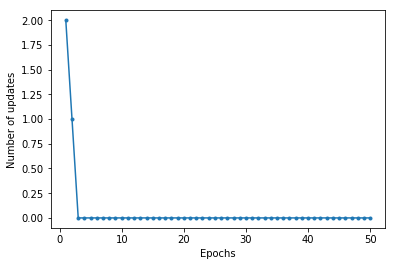

In [28]:
plt.plot(range(1, len(perceptron_model.errors_)+1), perceptron_model.errors_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Number of updates');

**a)** A acurácia foi de 1 e o erro passou a ser zero na quarta epoch.

**b)** Ao construirmos o modelo utilizando essas configurações de eta e n_iter, obtivemos uma acurácia de 1. Além disso, o erro passou a ser nulo depois da quarta epoch. Ou seja, poderíamos ter parado o treinamento na quarta iteração.

**c)** Aconteceu o mesmo que no item (b).

**d)** Com essa configuração, a acurácia foi de 0.9894736842105263 e o erro começou a ser nulo a partir da terceira epoch.

**e)** Ao empregarmos essa configuração, a acurácia foi de 1, mas foram necessárias sete epochs para o erro ir para 0.

**f)** Obtivemos uma acurácia de 0.9894736842105263 e a partir da terceira epoch o erro passou a ser nulo.

### Passo 02: Treinar, Testar e Analisar ADALINE

In [29]:
adaline_model = AdalineGD(eta=0.001, n_iter= 50)

In [30]:
adaline_model.fit(X_train, y_train)

In [31]:
ya_pred = adaline_model.predict(X_test)

In [32]:
adaline_accuracy = metrics.accuracy_score(y_test, ya_pred)
adaline_accuracy

1.0

Para construirmos o gráfico do perceptron, utilizamos o erro. Entretanto, para o adaline, utilizaremos a função de custo, uma vez que esta depende diretamente do erro e é utilizada para otimização do algoritmo. Ela será apresentada, no eixo y do gráfico, pelo seu logarítmo na base 10.

Text(0, 0.5, 'log(Sum-squared-error)')

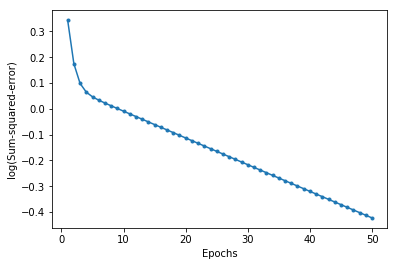

In [33]:
plt.plot(range(1,len(adaline_model.cost_)+1), np.log10(adaline_model.cost_), marker='.')
plt.xlabel('Epochs')
plt.ylabel('log(Sum-squared-error)')

**a)** Obtivemos uma acurácia de 0.5157894736842106 e a função de custo apresentou um comportamento crescente.

**b)** Utilizando essa configuração, obtivemos uma acurácia de 0.5157894736842106. Entretanto, a função de custo apresentou um comportamento crescente. Isso pode significar que a taxa de aprendizado está muito grande, fazendo com que ultrapassemos o erro mínimo.

**c)** Acontece o mesmo que nos itens  (a) e (b).

**d)** Ao utilizarmos essa configuração, obtivemos uma acurácia de 0.4842105263157895. Além disso, a função de custo apresentou um comportamento decrescente, conforme desejado. Apesar disso, a taxa de aprendizado se mostrou muito pequena para que a função de custo atingisse o valor mínimo durante as 25 epochs.

**e)** O comportamento é semelhante ao do item (d).

**f)** Com essa configuração, conseguimos obter uma acurácia de 1. Entretanto, foram necessárias 49 epochs.

Observando o comportamento dos algoritmos para os diferentes valores de hiperparâmetros adotados, percebemos que o perceptron apresentou uma acurácia maior na maioria dos testes, exceto quando **eta = 0.001** e **n_iter = 50**. Também pudemos observar o efeito da taxa de aprendizado no desempenho do algoritmo Adaline, uma vez que, se essa taxa fosse muito grande, a função de custo se tornava crescente; já, se a taxa fosse muito pequena, seriam necessárias muitas epochs para que a função de custo atingisse o valor mínimo.